Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'ATOM1'
against_currency = 'USD'

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2019-03-14,6.439715,6.639943,6.353963,6.526642,6.526642,7318172.0,ATOM1-USD
2019-03-15,6.633174,7.715249,6.432468,7.504351,7.504351,6057301.0,ATOM1-USD
2019-03-16,7.507990,8.305615,6.694531,7.383882,7.383882,3477393.0,ATOM1-USD
2019-03-17,7.357443,7.357443,4.727895,4.776164,4.776164,2653565.0,ATOM1-USD
2019-03-18,4.828242,5.229982,4.828242,5.110341,5.110341,2567201.0,ATOM1-USD
...,...,...,...,...,...,...,...
2021-07-23,11.442123,11.772867,11.103378,11.452106,11.452106,190731861.0,ATOM1-USD
2021-07-24,11.433393,11.619810,10.990705,11.451760,11.451760,147996396.0,ATOM1-USD
2021-07-25,11.457888,12.428796,11.317348,11.408082,11.408082,300857091.0,ATOM1-USD
2021-07-26,11.389018,11.804259,11.046357,11.713592,11.713592,189534096.0,ATOM1-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 868 entries, 2019-03-14 to 2021-07-27
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      841 non-null    float64
 1   high      841 non-null    float64
 2   low       841 non-null    float64
 3   close     841 non-null    float64
 4   adjclose  841 non-null    float64
 5   volume    841 non-null    float64
 6   ticker    868 non-null    object 
 7   spread    841 non-null    float64
dtypes: float64(7), object(1)
memory usage: 61.0+ KB


## Plot the closing value of Cosmos over time

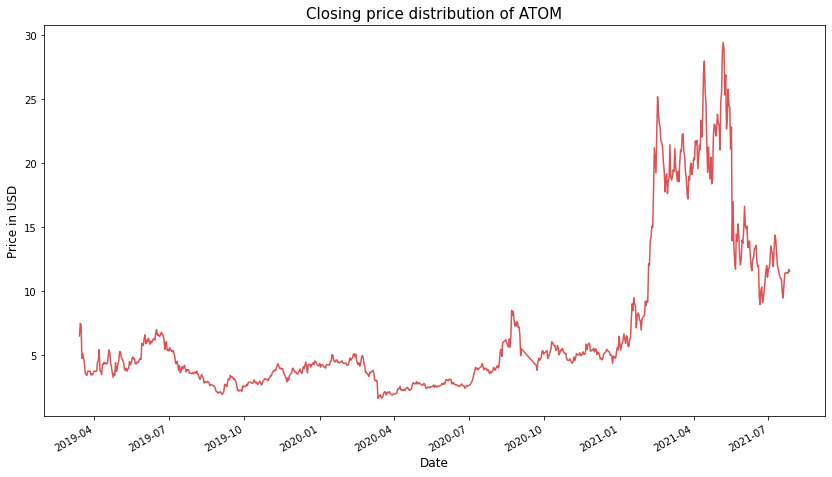

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of ATOM", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of Cosmos')

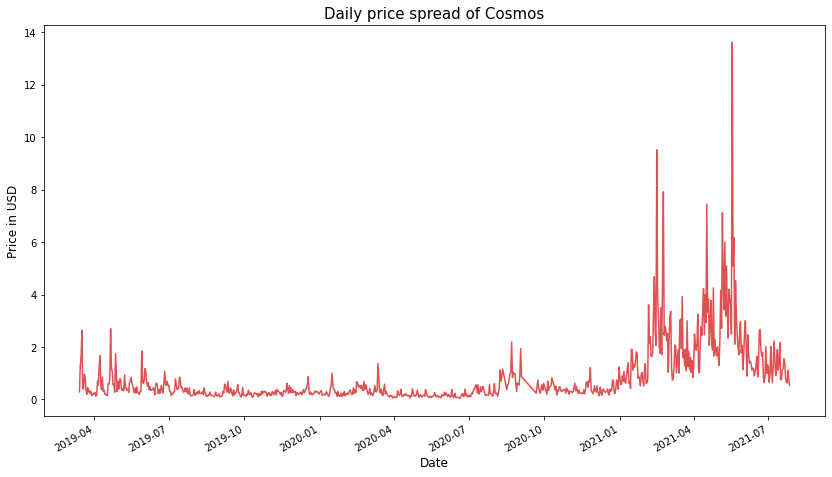

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of Cosmos", fontsize=15)

## Candlestick chart

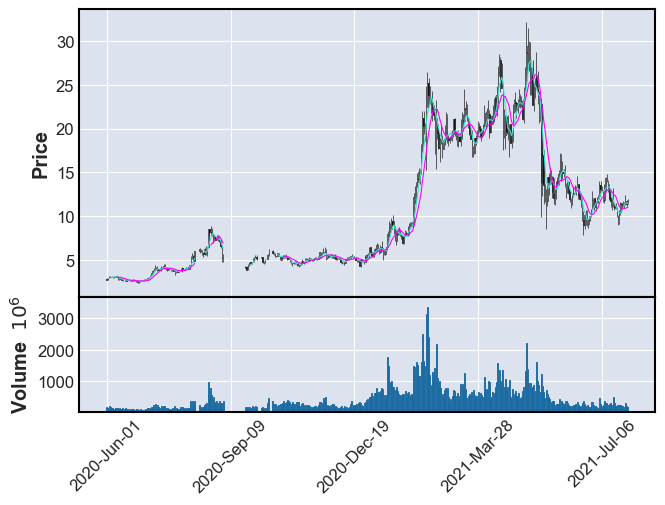

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2019-03-14,6.526642
1,2019-03-15,7.504351
2,2019-03-16,7.383882
3,2019-03-17,4.776164
4,2019-03-18,5.110341
...,...,...
863,2021-07-23,11.452106
864,2021-07-24,11.451760
865,2021-07-25,11.408082
866,2021-07-26,11.713592


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
890,2021-08-22,12.543457,10.414362,14.916450
891,2021-08-23,12.552295,10.318448,14.800165
892,2021-08-24,12.556094,10.423987,14.993617
893,2021-08-25,12.496861,10.136973,14.944953
894,2021-08-26,12.440901,10.211214,14.764873


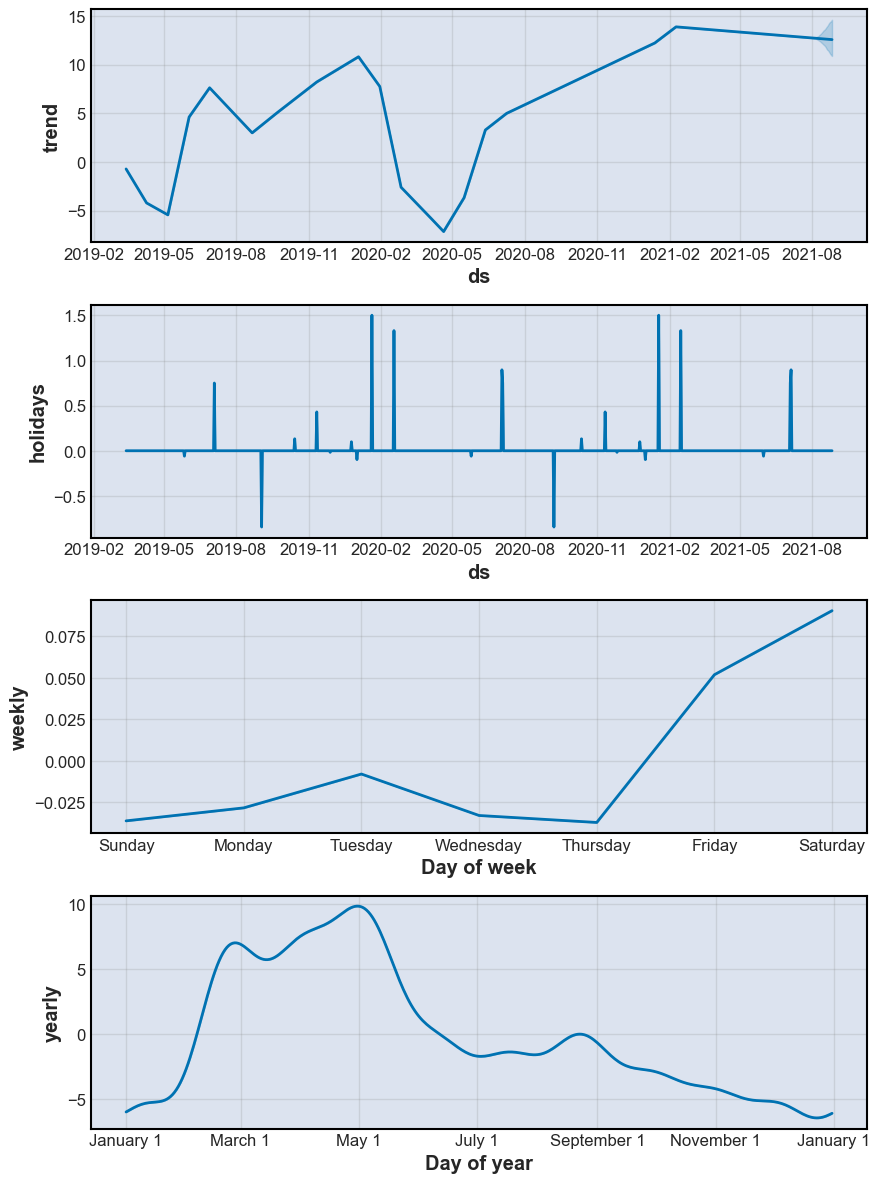

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

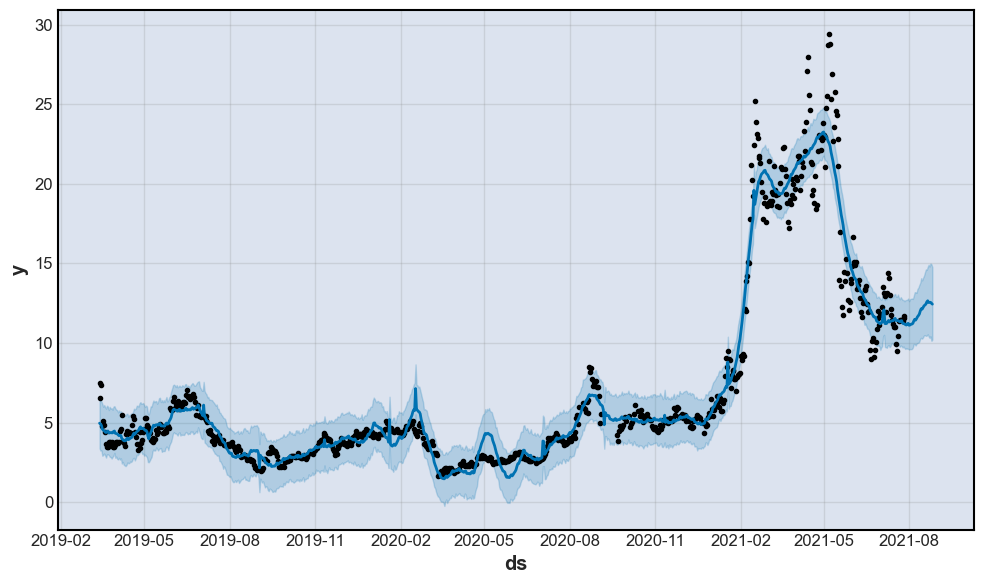

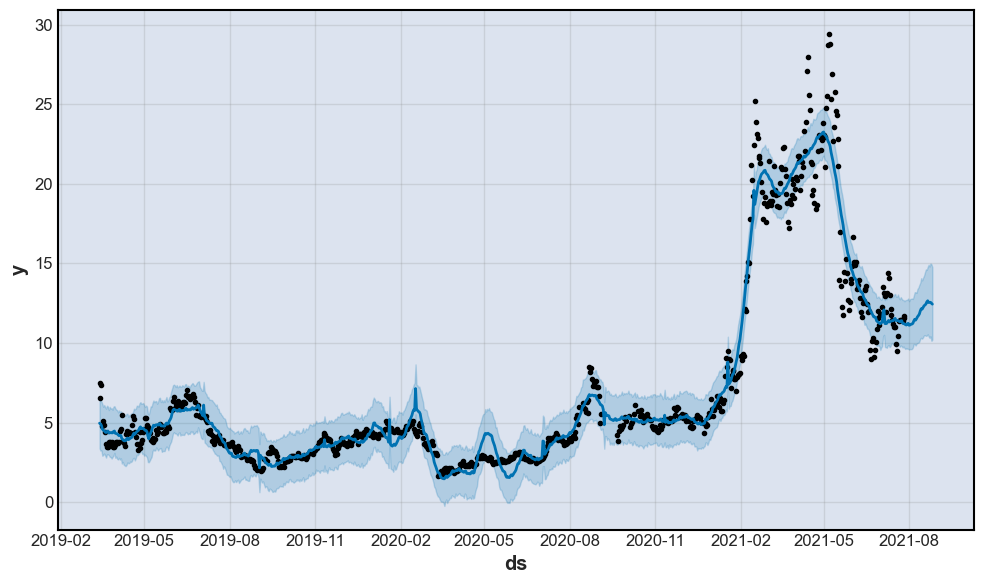

In [10]:
m.plot(forecast)